In [1]:
import numpy as np
import pandas as pd
churn_df = pd.read_csv('../data/churn_df2.csv',header=0)

In [45]:
churn_df2=pd.DataFrame(index=churn_df['user_account_id'].unique())
#churn_df2['Churn']=churn_df.groupby(['user_account_id'])['Churn'].mean()
templ=list(churn_df.columns.values)
churn_df2['Totalmonths']=churn_df.groupby(['user_account_id'])['month'].count()
templ.remove('user_account_id')
templ.remove('month')
templ.remove('year')
#Creating mean of all the features grouped by accountid 
for col in templ:
    churn_df2[col]=churn_df.groupby(['user_account_id'])[col].mean()
churn_df2.replace(np.inf, np.nan,inplace=True)
churn_df2.fillna(0,inplace=True)

In [76]:
#churn_df2.drop(['user_account_id','month'],axis=1,inplace=True)
churn_df2[churn_df2.columns.values[:-21]].describe()
# Going by the below summary, there is a 20% churn rate 

,Churn,user_lifetime,user_intake_sum,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,user_use_gprs,user_does_reload,...,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage
count,66469.000000,66469.000000,66469.0000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,...,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000,66469.000000
mean,0.209225,3805.790857,0.0347,40.953023,9.757533,6.625315,0.835317,0.611724,0.048501,0.534231,...,21.532728,95.693278,1.375436,62.925185,3.972076,102.763729,7.371948,62.846234,3.998766,7.466281
std,0.406759,5772.918023,0.1454,159.725802,17.505266,12.228176,0.320622,0.439120,0.179486,0.401691,...,40.440145,178.992434,8.668585,134.760188,22.580441,251.967264,36.288812,176.167031,19.541499,91.517399
min,0.000000,1.000000,0.0000,0.000000,0.000000,-30.060000,0.000000,0.000000,0.000000,0.000000,...,-17.239000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,488.000000,0.0000,1.000000,1.090000,0.170000,1.000000,0.000000,0.000000,0.000000,...,0.000000,3.253333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1247.000000,0.0000,2.333333,5.890000,2.916667,1.000000,1.000000,0.000000,0.666667,...,10.000000,34.286667,0.000000,17.263333,0.000000,17.000000,0.000000,6.666667,0.000000,0.000000
75%,0.000000,2016.000000,0.0000,8.000000,12.860000,8.056667,1.000000,1.000000,0.000000,1.000000,...,26.676667,112.566667,0.000000,68.400000,0.460000,100.666667,2.000000,54.333333,1.000000,0.000000
max,1.000000,15947.000000,1.0000,864.333333,1780.933333,474.753333,1.000000,1.000000,1.000000,1.000000,...,2450.000000,5698.366667,859.570000,5457.000000,2074.633333,9662.000000,3642.666667,7256.333333,1658.000000,6599.686667


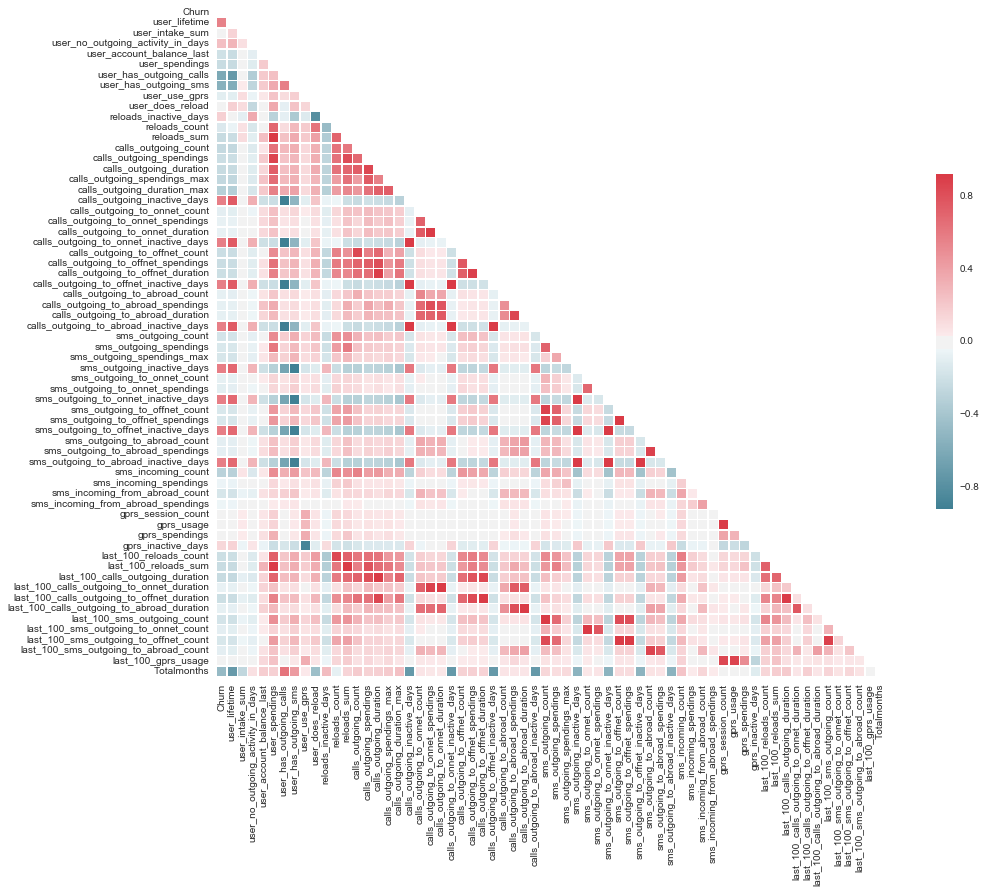

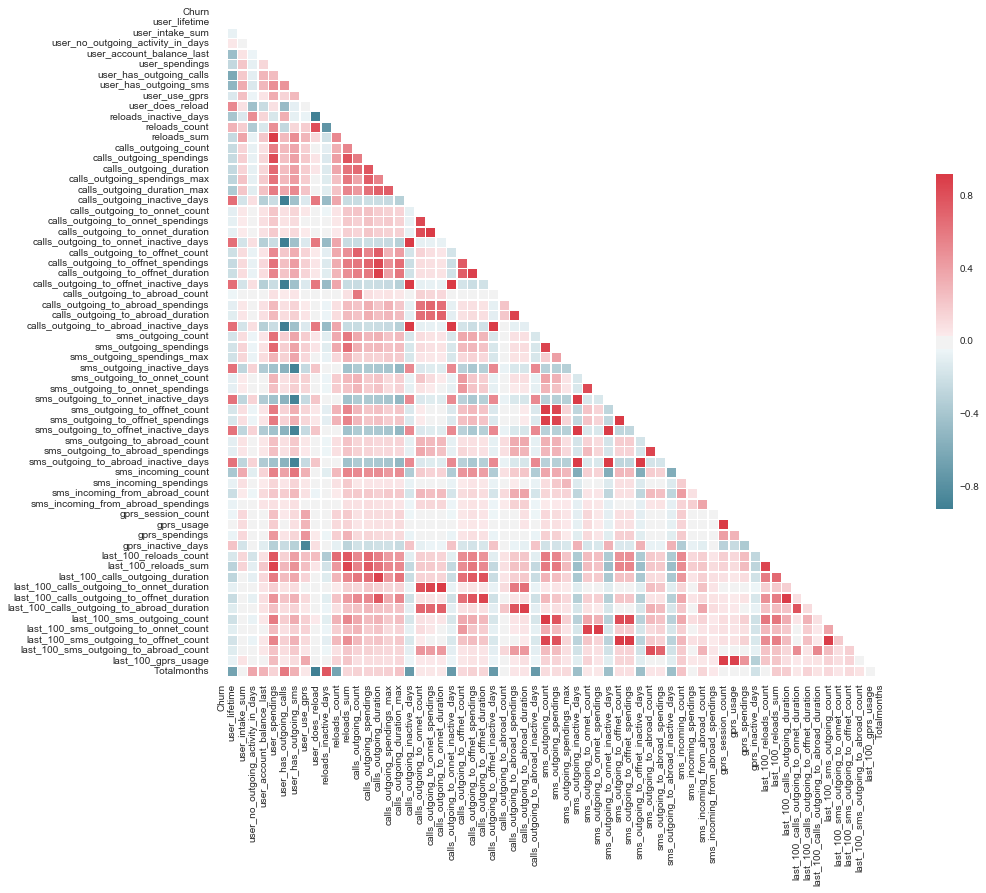

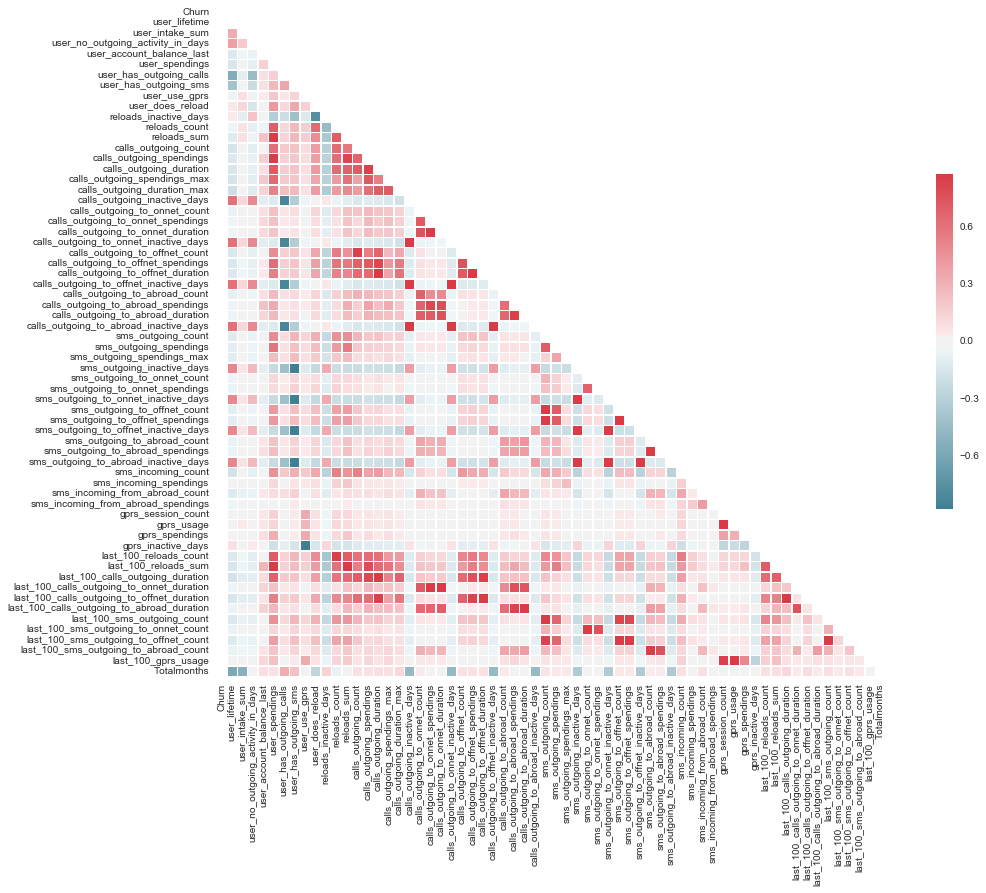

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
#templ.remove('user_account_id')
#templ.remove('month')
#templ.remove('year')
templ=list(churn_df2.columns.values[:-20])
corr0 = churn_df2[templ].corr()
corr1=churn_df2[templ][churn_df2.Churn>0].corr()
corr2=churn_df2[templ][churn_df2.Churn==0].corr()

for i,enum in enumerate([corr0,corr1,corr2]):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(enum, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(18, 12))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(enum, mask=mask, cmap=cmap, vmax=.3,
                square=True, xticklabels=True, yticklabels=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

#First chart shows correlation for entire data, and the second one is for users who churn and the last one where users dont churn    
#Churning is correlated with inactive days of calls onnet,offnet, overall, reload , negatively correlated to outgoing calls

# For churn however user lifetime, outgoing activity, user outgoing calls and sms,reload, inactive days, outgoing calls and sms
#inactive days of all types and last 100 days reload count and sum seems to be giving a good correlation

In [ ]:
churn_df2['avg_amountpercall']=churn_df2['calls_outgoing_spendings'].div(churn_df2.calls_outgoing_count, axis=0)
churn_df2['avg_durationpercall']=churn_df2['calls_outgoing_duration'].div(churn_df2.calls_outgoing_count, axis=0)
churn_df2['exp_to_mean_amount']=churn_df2['calls_outgoing_spendings_max'].div(churn_df2.avg_amountpercall, axis=0)
churn_df2['exp_to_mean_duration']=churn_df2['calls_outgoing_duration_max'].div(churn_df2.avg_durationpercall, axis=0)
churn_df2['avg_recharge']=churn_df2['reloads_sum'].div(churn_df2.reloads_count, axis=0)
churn_df2['avg_amountpercall_onnet']=churn_df2['calls_outgoing_to_onnet_spendings'].div(churn_df2.calls_outgoing_to_onnet_count, axis=0)
churn_df2['avg_durationpercall_onnet']=churn_df2['calls_outgoing_to_onnet_duration'].div(churn_df2.calls_outgoing_to_onnet_count, axis=0)
churn_df2['avg_amountpercall_ofnet']=churn_df2['calls_outgoing_to_offnet_spendings'].div(churn_df2.calls_outgoing_to_offnet_count, axis=0)
churn_df2['avg_durationpercall_ofnet']=churn_df2['calls_outgoing_to_offnet_duration'].div(churn_df2.calls_outgoing_to_offnet_count, axis=0)
churn_df2['avg_amountpercall_oc']=churn_df2['calls_outgoing_to_abroad_spendings'].div(churn_df2.calls_outgoing_to_abroad_count, axis=0)
churn_df2['avg_durationpercall_oc']=churn_df2['calls_outgoing_to_abroad_duration'].div(churn_df2.calls_outgoing_to_abroad_count, axis=0)
churn_df2['avg_amountpersms_oc']=churn_df2['sms_outgoing_spendings'].div(churn_df2.sms_outgoing_count, axis=0)
churn_df2['exp_mean_sms']=churn_df2['sms_outgoing_spendings'].div(churn_df2.avg_amountpersms_oc, axis=0)
churn_df2['avg_amountpersms_onnet']=churn_df2['sms_outgoing_to_onnet_spendings'].div(churn_df2.sms_outgoing_to_onnet_count, axis=0)
churn_df2['avg_amountpersms_ofnet']=churn_df2['sms_outgoing_to_offnet_spendings'].div(churn_df2.sms_outgoing_to_offnet_count, axis=0)
churn_df2['avg_amountpersms_oc']=churn_df2['sms_outgoing_to_abroad_spendings'].div(churn_df2.sms_outgoing_to_abroad_count, axis=0)
churn_df2['avg_amountpersms_i']=churn_df2['sms_incoming_spendings'].div(churn_df2.sms_incoming_count, axis=0)
churn_df2['avg_amountpersms_oc_i']=churn_df2['sms_incoming_from_abroad_spendings'].div(churn_df2.sms_incoming_from_abroad_count, axis=0)
churn_df2['avg_kbpersession']=churn_df2['gprs_usage'].div(churn_df2.gprs_session_count, axis=0)
churn_df2['avg_amountpersession']=churn_df2['gprs_spendings'].div(churn_df2.gprs_session_count, axis=0)
churn_df2['avg_recharge_l100']=churn_df2['last_100_reloads_sum'].div(churn_df2.last_100_reloads_count, axis=0)
churn_df2.replace(np.inf, np.nan,inplace=True)
churn_df2.fillna(0,inplace=True)


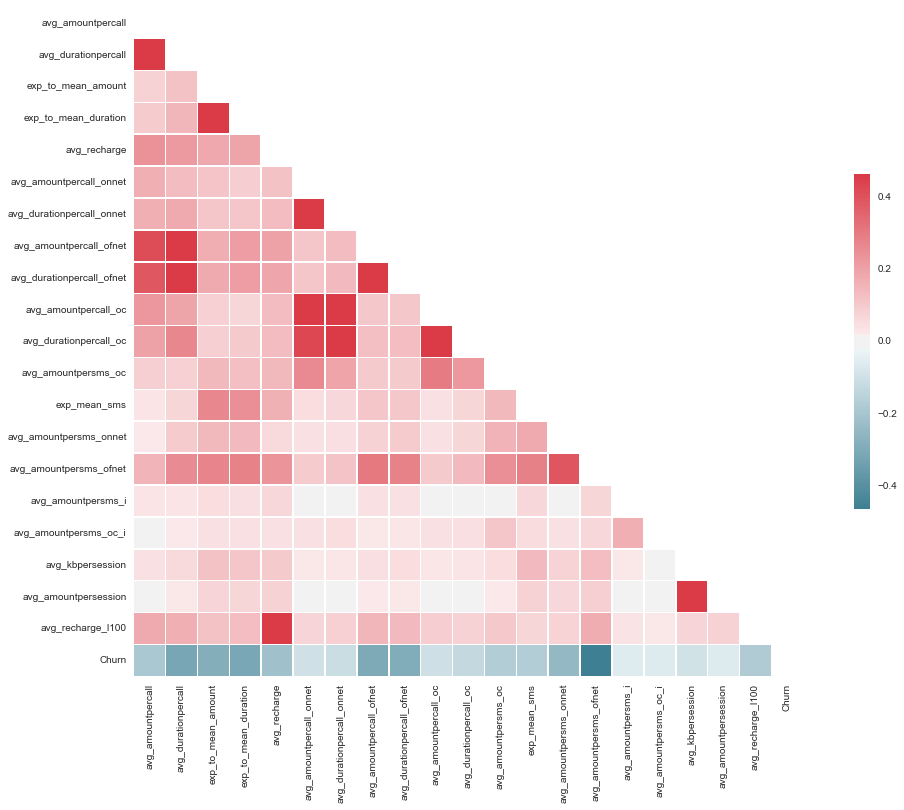

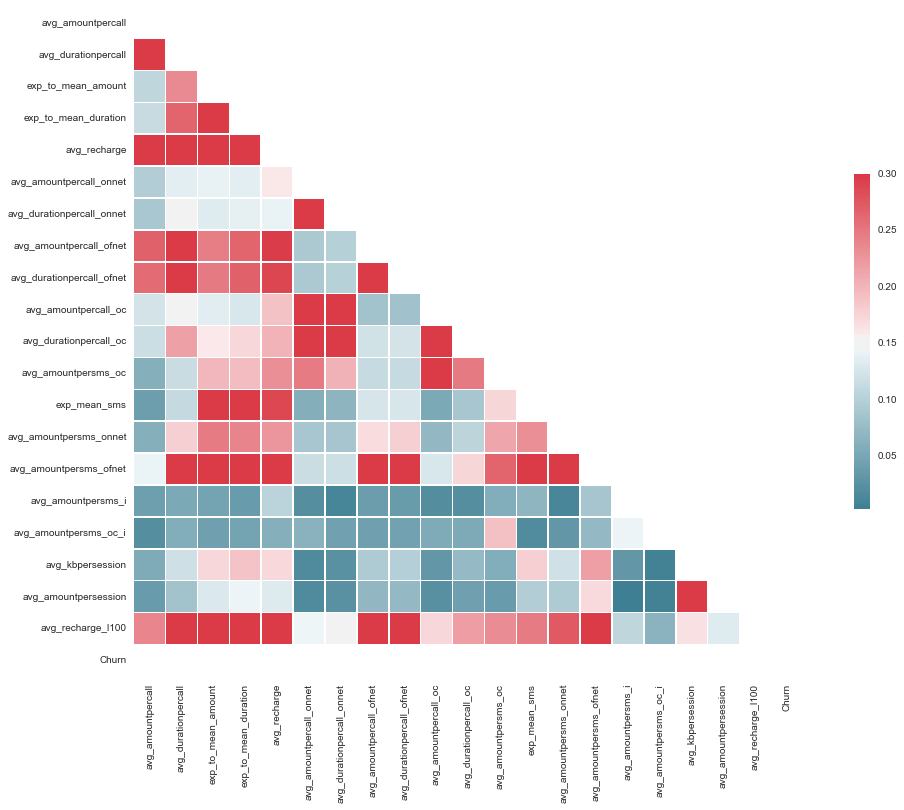

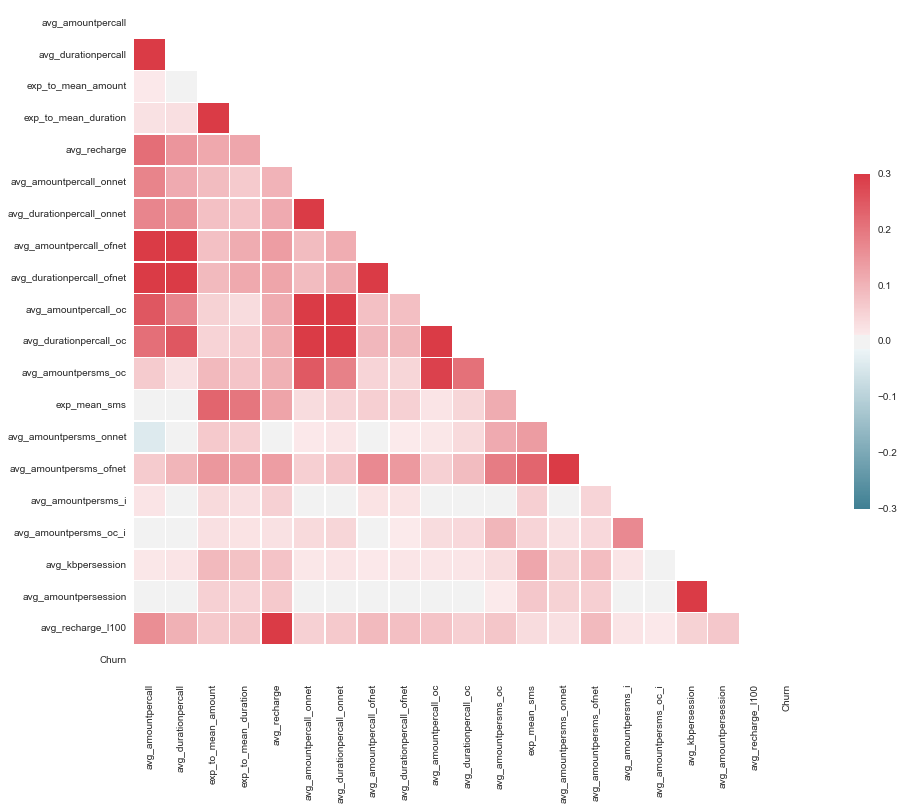

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#templ.remove('user_account_id')
#templ.remove('month')
#templ.remove('year')
templ=list(churn_df2.columns.values[-20:])
templ.append('Churn')
corr0 = churn_df2[templ].corr()
corr1=churn_df2[templ][churn_df2.Churn>0].corr()
corr2=churn_df2[templ][churn_df2.Churn==0].corr()
sns.set(style="white")
for i,enum in enumerate([corr0,corr1,corr2]):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(enum, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(18, 12))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(enum, mask=mask, cmap=cmap, vmax=.3,square=True, xticklabels=True, yticklabels=True,linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# In the first chart we can observe an obvious negative correlation on averages drawn from the existing parameters
# However these parameters are not showing any correlations with and with out churn individually so its not worth moving with these parameters.

1: In here  the values 0, 0.33, 0.66 and 1.0 means no value in last three months to value of 1 in all the months
2: As mentioned in the below graphs from the obvious fact that users who dont make any calls/sms in the last three months are most possible customers to churn out, also the users who dont recharge


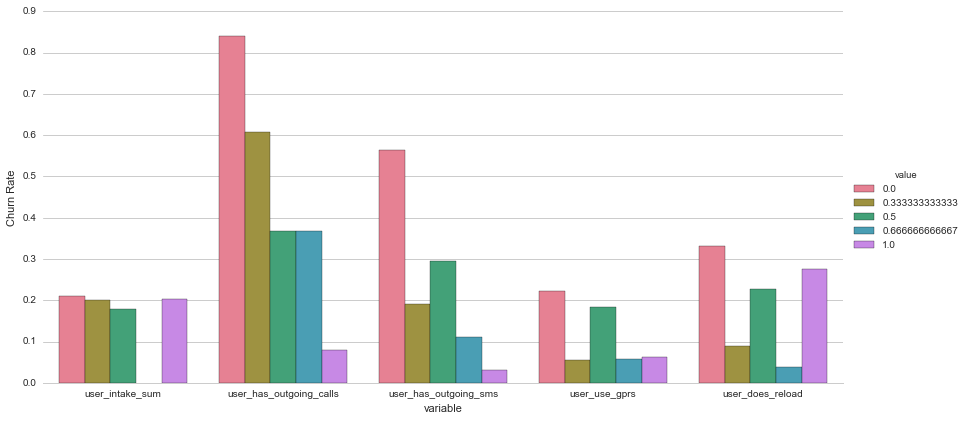

In [85]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns
sns.set(style="whitegrid")
col_spec=['user_intake_sum','user_has_outgoing_calls','user_has_outgoing_sms','user_use_gprs','user_does_reload']
df1 = pd.melt(churn_df2, id_vars=['Churn'], value_vars=col_spec, var_name='variable' )
# Create a factorplot
print "1: In here  the values 0, 0.33, 0.66 and 1.0 means no value in last three months to value of 1 in all the months"
print "2: As mentioned in the below graphs from the obvious fact that users who dont make any calls/sms in the last three months \
are most possible customers to churn out, also the users who dont recharge"
g = sns.factorplot( x="variable", y="Churn", hue='value', data=df1, size=6, aspect=2, kind="bar", palette="husl", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

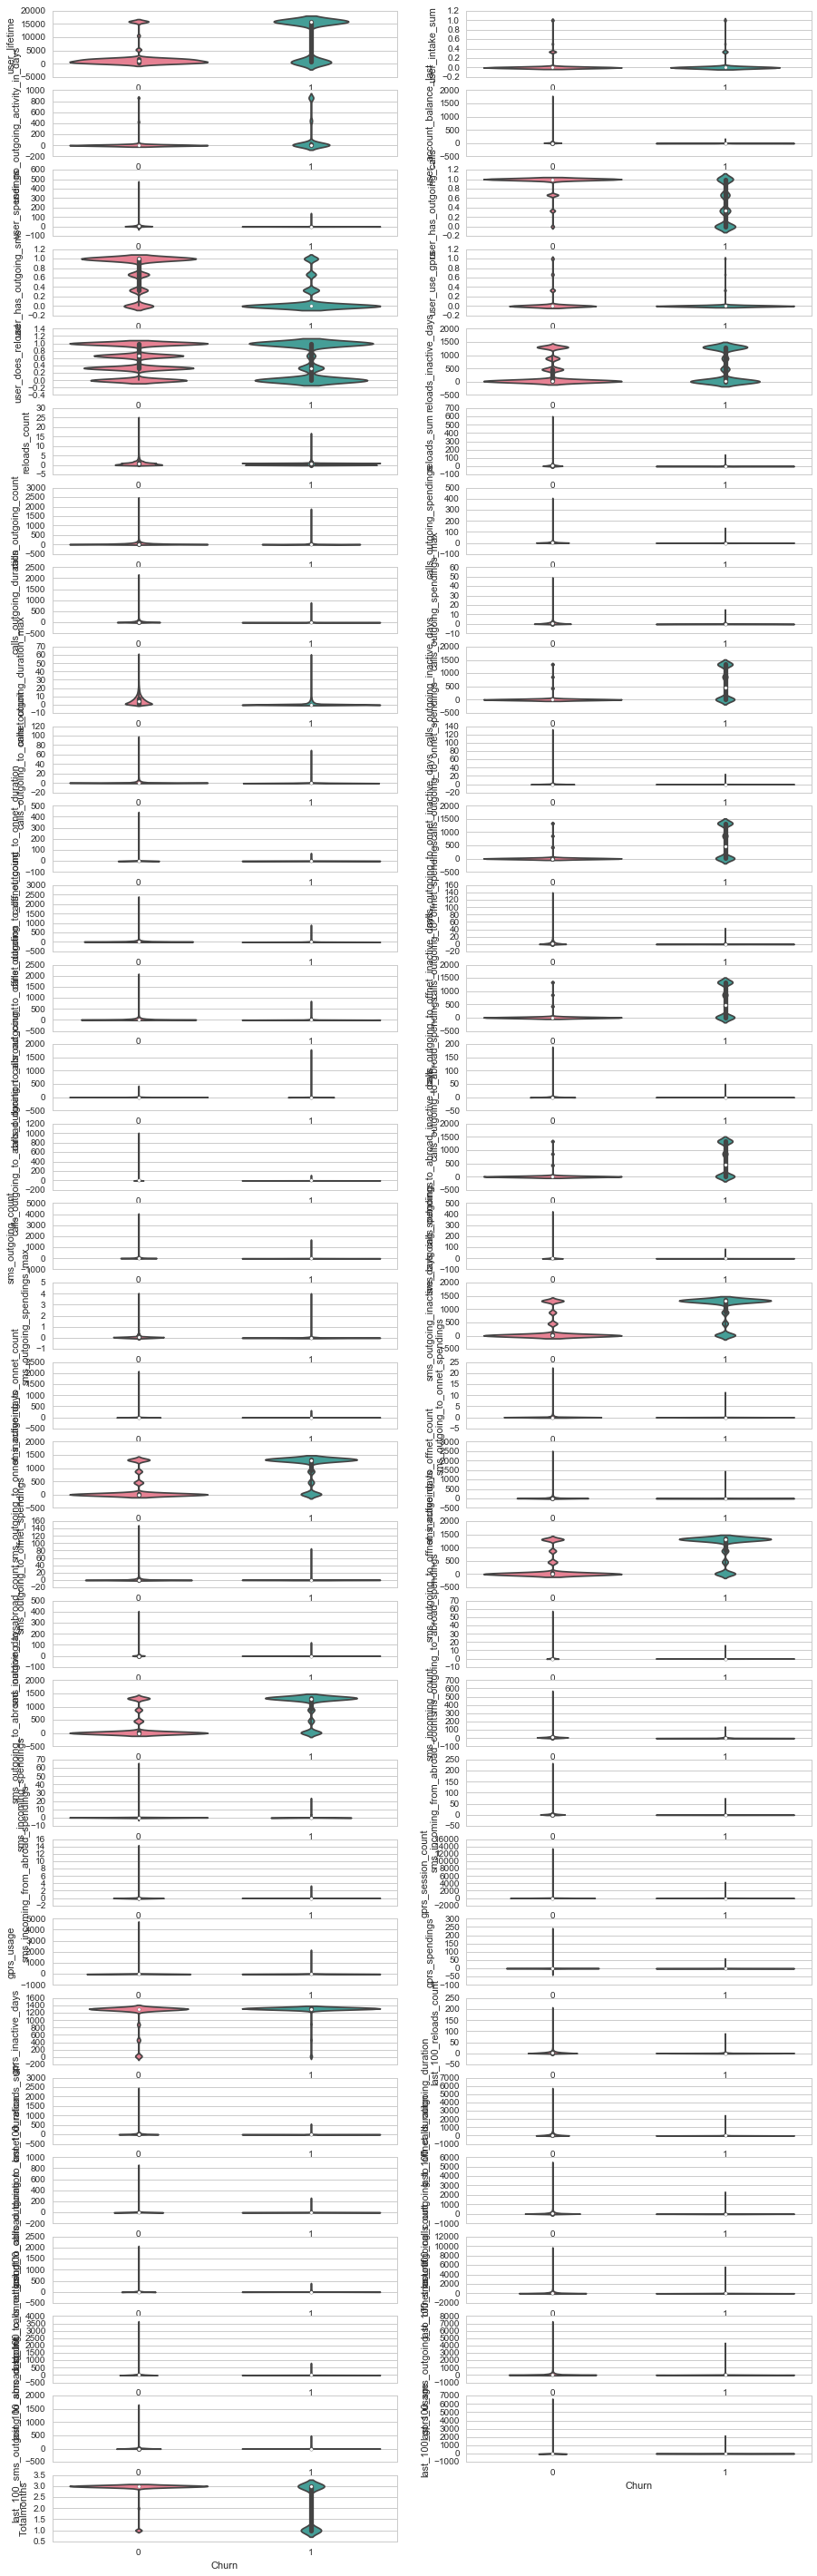

In [100]:

cols = [col for col in churn_df2.columns.values[:-20]]
plt.figure(figsize=(15, 50))
for e, column in enumerate(cols[1:]):
    plt.subplot(32, 2, e + 1)    
    sns.violinplot( data=churn_df2, x='Churn', y=column, palette="husl")
    #print column

In [88]:
col_spec1=['user_lifetime_new',
       'user_no_outgoing_activity_in_days_new',
       'user_account_balance_last_new', 'user_spendings_new',
       'reloads_inactive_days_new', 'calls_outgoing_inactive_days_new',
       'calls_outgoing_to_onnet_inactive_days_new',
       'calls_outgoing_to_offnet_inactive_days_new',
       'calls_outgoing_to_abroad_inactive_days_new',
       'sms_outgoing_inactive_days_new',
       'sms_outgoing_to_onnet_inactive_days_new',
       'sms_outgoing_to_offnet_inactive_days_new',
       'sms_outgoing_to_abroad_count_new',
       'sms_outgoing_to_abroad_spendings_new',
       'sms_outgoing_to_abroad_inactive_days_new',
       'gprs_inactive_days_new', 'last_100_calls_outgoing_duration_new',
       'last_100_calls_outgoing_to_onnet_duration_new',
       'last_100_calls_outgoing_to_offnet_duration_new',
       'last_100_calls_outgoing_to_abroad_duration_new',
       'last_100_sms_outgoing_count_new',
       'last_100_sms_outgoing_to_onnet_count_new',
       'last_100_sms_outgoing_to_offnet_count_new',
       'last_100_sms_outgoing_to_abroad_count_new',
       'last_100_gprs_usage_new', 'avg_amountpercall_new',
       'avg_durationpercall_new', 'exp_to_mean_amount_new',
       'exp_to_mean_duration_new', 'avg_amountpercall_onnet_new',
       'avg_durationpercall_onnet_new', 'avg_amountpercall_ofnet_new',
       'avg_durationpercall_ofnet_new', 'avg_amountpercall_oc_new',
       'avg_durationpercall_oc_new', 'avg_amountpersms_oc_new',
       'exp_mean_sms_new', 'avg_amountpersms_onnet_new',
       'avg_amountpersms_ofnet_new', 'avg_amountpersms_i_new',
       'avg_amountpersms_oc_i_new', 'avg_kbpersession_new',
       'avg_amountpersession_new', 'avg_recharge_l100_new',
       'avg_recharge_new']


In [ ]:
import pandas as pd
import time
import csv
import numpy as np
import os
from sklearn.metrics import accuracy_score,auc,average_precision_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.lda import LDA
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.cross_validation import KFold,cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib
import timeit as it
scaler = StandardScaler()
print(it.default_timer())
start=it.default_timer()
train = pd.read_csv('C:\Users\TG\Documents\interview\Churn_df2.csv',header=0,index_col=0)
Y=train['Churn'].values
train.drop('Churn',axis=1,inplace=True)
train.replace(np.inf, np.nan,inplace=True)
train=train.fillna(0,axis=1)
X=train[train.columns.values[:-21]].values
X=scaler.fit_transform(X)
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.3, random_state=42)
#index1=X_Train['id']
#index_1=X_Test['id']
#X_Train.drop('id',axis=1,inplace=True)
#X_Test.drop('id',axis=1,inplace=True)
classifiers = [    
    ExtraTreesClassifier(n_estimators=20),
    RandomForestClassifier(n_estimators=20),    
    LDA(),
    GaussianNB(),    
    GradientBoostingClassifier(),
    KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', leaf_size=100, p=2, metric='minkowski'),
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=20),
    SGDClassifier(loss='log',n_iter=10,verbose=5,learning_rate='invscaling',eta0=0.0000000001),
    svm.SVC()    
]

def cross_validate(classifier):
    #X_Train,Y_Train=X_Train1.copy(),Y_Train1.copy() 
    start = time.time()
    #print(X_Train.columns)
    scores=cross_val_score(classifier,X_Train,(Y_Train),cv=5,scoring='roc_auc')
    #print('K-Fold cross validation to verify consistancy in the errors')
    print('K-Fold cross validation to verify consistancy in the errors'+classifier.__class__.__name__+str((scores)))
    classifier.fit(X_Train, Y_Train)
    joblib.dump(classifier, 'C:\Users\TG\Documents\interview\classif\\'+classifier.__class__.__name__+'-acc.pkl')
    print ('  -> Training time:', time.time() - start)
                
def evaluate(classifier):
    clf= joblib.load('C:\Users\TG\Documents\interview\classif\\'+classifier.__class__.__name__+'-acc.pkl')
    #X_Test,Y_Test=X_Test1.copy(),Y_Test1.copy()
    temp=clf.predict(X_Test)
    try:
        print (clf.__class__.__name__+'Accuracy Score: %5.6f'%roc_auc_score(Y_Test, temp))
    except:
        print (clf.__class__.__name__+'Accuracy Score: %5.6f'%roc_curve(Y_Test, temp))
    if not os.path.exists('results2/'):
        os.makedirs('results2/')
    predictions = np.column_stack((temp))
    csvfile = 'results2/' + classifier.__class__.__name__ + '-test1-submit-acc.csv'
    with open(csvfile, 'w') as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerow(['id','purchased'])
        writer.writerows(predictions)                

def total_exec(classifiers):
    cross_validate(classifiers)
    evaluate(classifiers)

for classifier in classifiers:
    total_exec(classifier)
    
print(it.default_timer()-start)    

Optimal number of features : 30


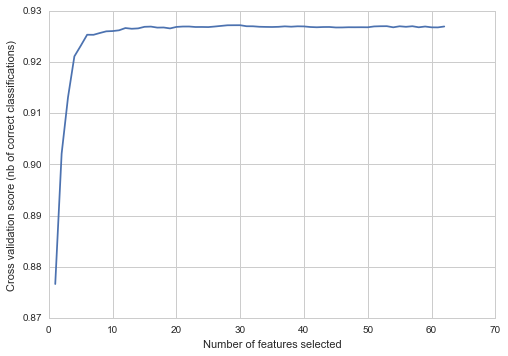

In [115]:
#Steps to identify optimal features via feature elimination technique
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
rfecv = RFECV(estimator=GradientBoostingClassifier(), step=1, cv=StratifiedKFold(Y_Train,2),scoring='roc_auc')
rfecv.fit(X_Train,Y_Train)
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [116]:
#No change in the score at the moment
temp=rfecv.predict(X_Test)
roc_auc_score(Y_Test, temp)

0.82381685325063125